In [1]:
%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
import plotly.graph_objects as go  #plotly 4.0.0rc1
from plotly.subplots import make_subplots
from matplotlib import pyplot
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import itertools

from importlib import reload
import matplotlib.cm as cm # matplotlib's color map library
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
# Univariate gaussian system

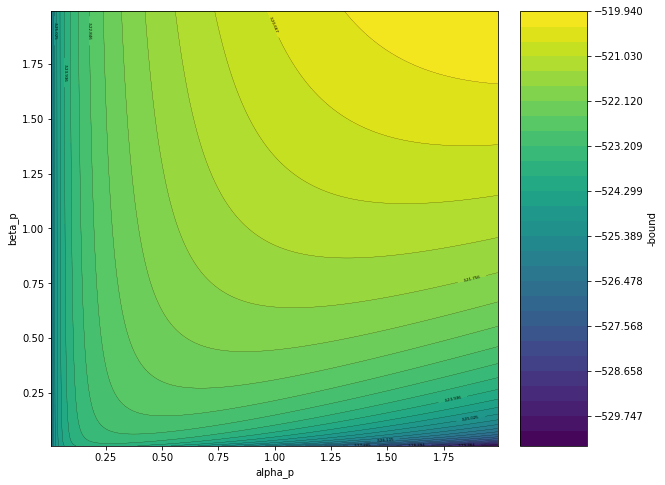

In [3]:
# alpha_p vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_gamma.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('alpha_p')
axes.set_ylabel('beta_p')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


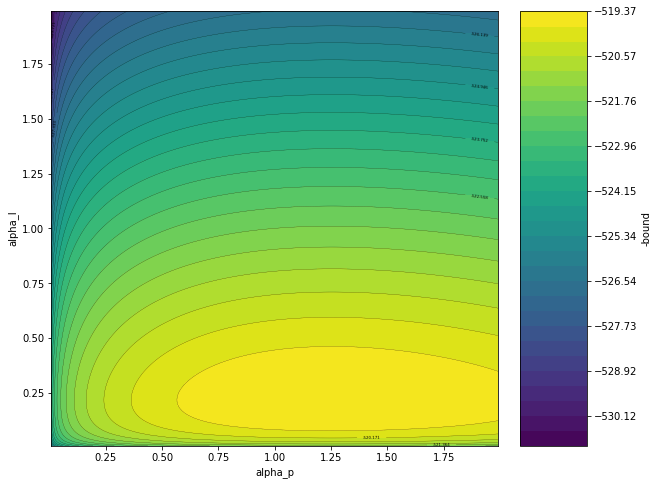

In [4]:
# alpha_l vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_gamma_alphas.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour

levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.01, 2, delta1)
ylist = np.arange(0.01, 2, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('alpha_l')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

In [5]:
alphas = np.load('../../numerical_analysis/alphas.npy')
bound = np.load('../../numerical_analysis/bound.npy')
alphas_p = np.load('../../numerical_analysis/alphas_p.npy')
rb_value_p = np.load('../../numerical_analysis/rb_value_p.npy')


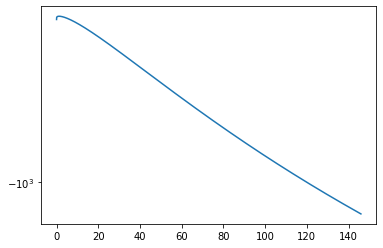

In [6]:
# KL bound as a function of alpha_p

fig, ax = plt.subplots()
ax.plot(alphas_p, rb_value_p)
ax.set_yscale('symlog')

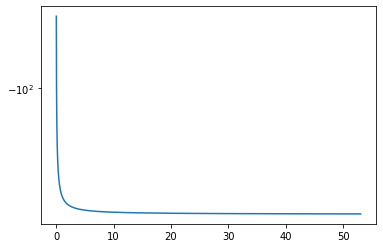

In [7]:
# Renyi bound as a function of alpha

fig, ax = plt.subplots()
ax.plot(alphas, bound)
ax.set_yscale('symlog')

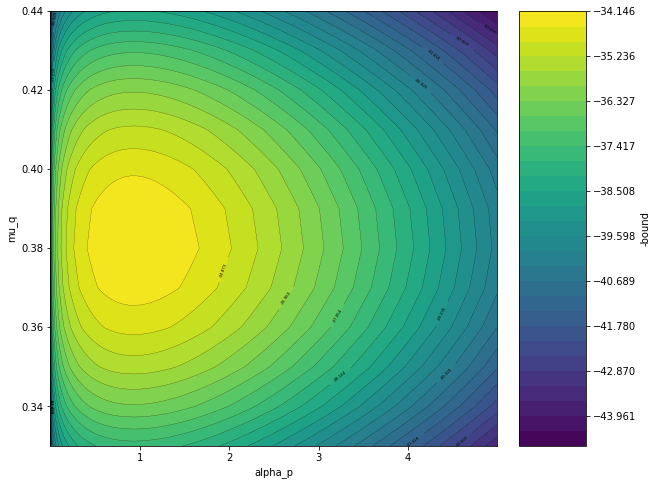

In [8]:
# mu_q vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

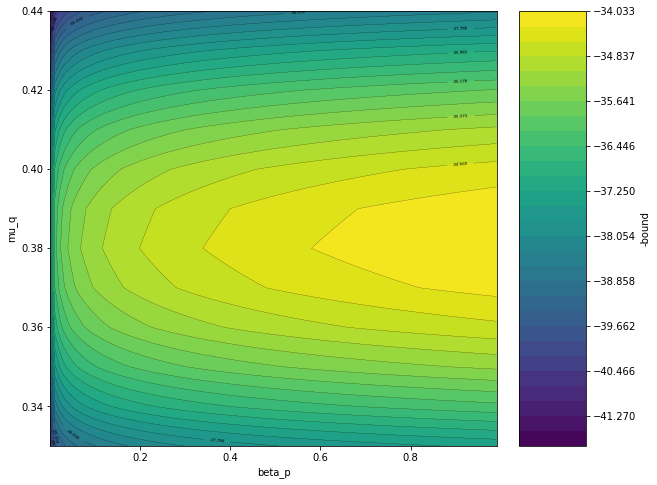

In [9]:
# mu_q vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_beta_p_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.01
delta2 = 0.01
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

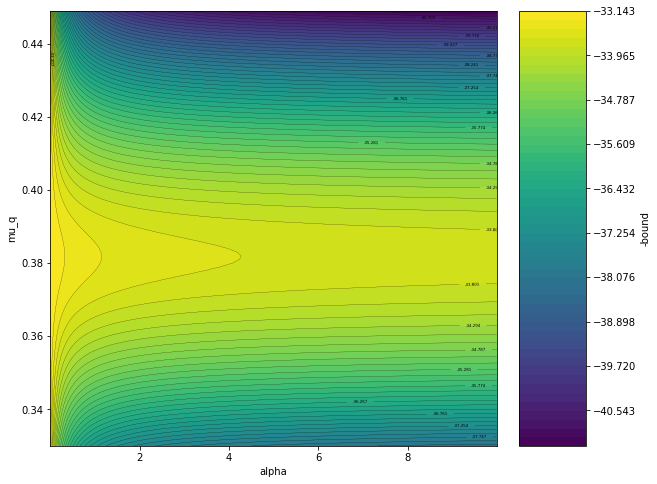

In [10]:
# mu_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_muq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.001
xlist = np.arange(0.001, 10, delta1)
ylist = np.arange(0.33, 0.45, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha')
axes.set_ylabel('mu_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)



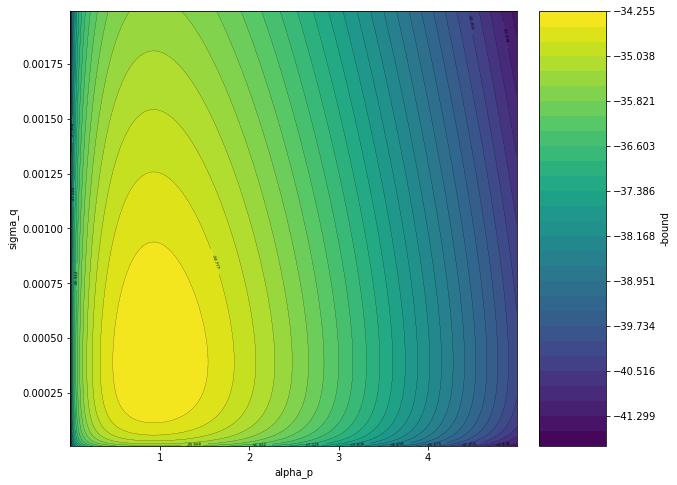

In [54]:
# sigma_q vs alpha_p

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_sigmaq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

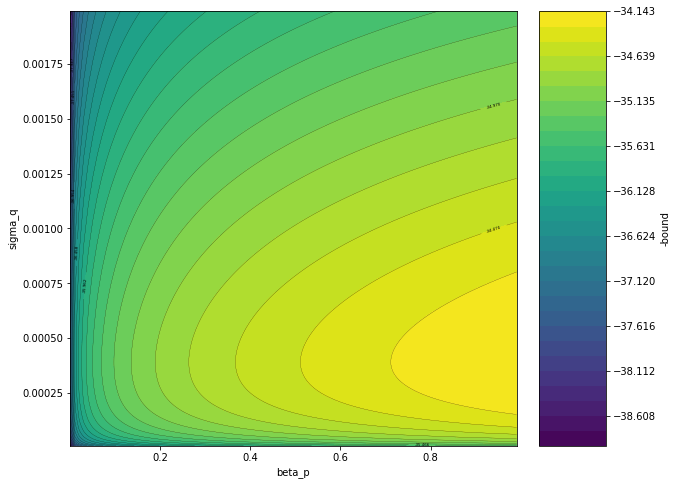

In [55]:
# sigma_q vs beta_p

data_contour = pd.read_csv('../../numerical_analysis/contour_beta_p_sigmaq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

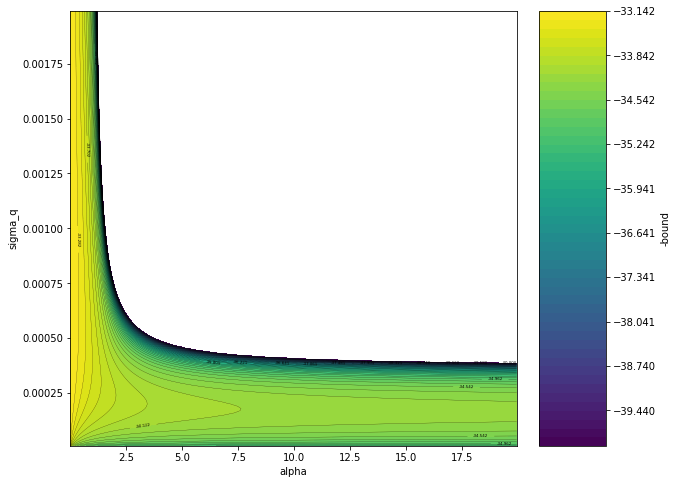

In [52]:
# sigma_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_sigmaq.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
data_contour = data_contour.fillna(np.nanmin(data_contour.to_numpy()))

levels = np.linspace(-40,data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.04
delta2 = 0.00001
xlist = np.arange(0.001, 20, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)



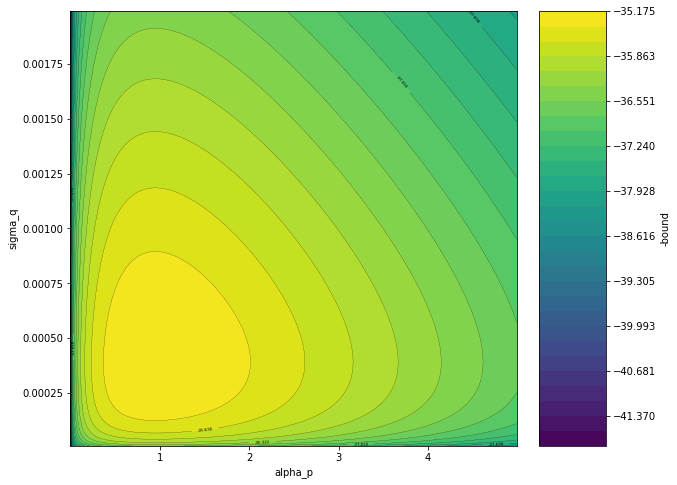

In [56]:
# sigma_q vs gamma constant var
# sigma_q vs alpha (Renyi bound)

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_beta_p_sigmaq_const_mean.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 5, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('alpha_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

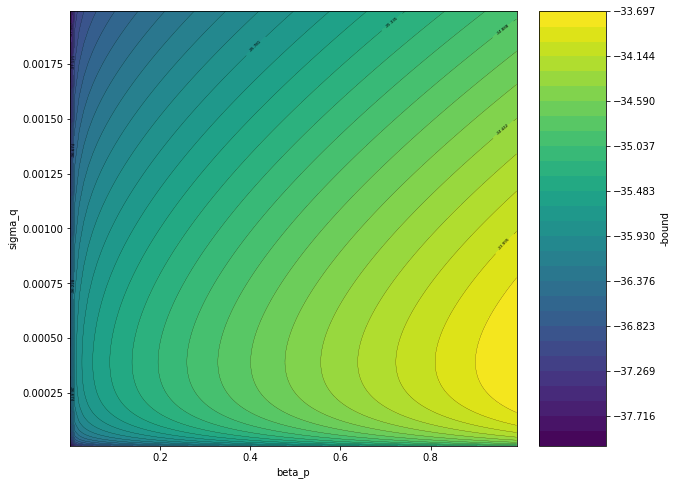

In [58]:
# sigma_q vs gamma constant var

data_contour = pd.read_csv('../../numerical_analysis/contour_alpha_p_beta_p_sigmaq_const_var.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=30)
linewidth_contour = 0.2

    
delta1 = 0.01
delta2 = 0.00001
xlist = np.arange(0.001, 1, delta1)
ylist = np.arange(0.00001, 0.002, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)


#line_colors1 = ['black']
axes.set_xlabel('beta_p')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
#fig.savefig('/home/francesco/renyibounds/plot.pdf', bbox_inches='tight', pad_inches=0)

In [11]:
# Renyi multimodal bound

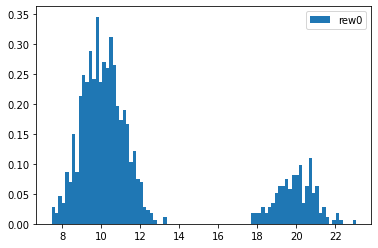

In [115]:
samples0 = list(np.load('../../numerical_analysis/multimodal_samples.npy'))
rew0 = list(np.load('../../numerical_analysis/multimodal_rew.npy'))
fig = plt.hist(rew0,  density=True, alpha=1, bins=90, label='rew0')
plt.legend(loc='upper right')


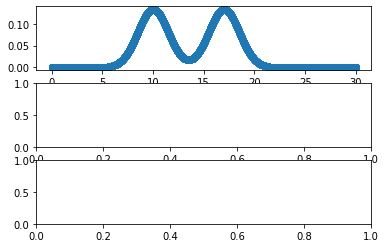

In [116]:
ps0 = list(np.load('../../numerical_analysis/multimodal_ps.npy'))
fig, axes = plt.subplots(3)
axes[0].scatter(samples0, ps0)


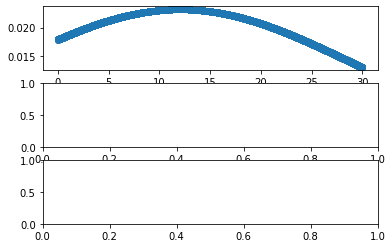

In [117]:
pos0 = list(np.load('../../numerical_analysis/multimodal_pos.npy'))
fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pos0)

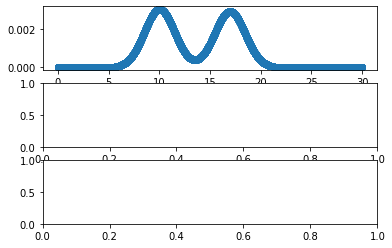

In [118]:
pso0 = list(np.load('../../numerical_analysis/multimodal_pso.npy'))
fig, axes = plt.subplots(3)

axes[0].scatter(samples0, pso0)

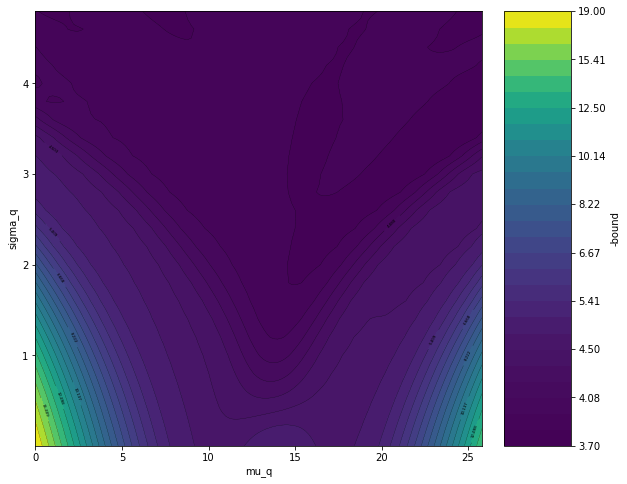

In [201]:
# alpha = 1e-6
data_contour = pd.read_csv('../../numerical_analysis/contour_1e-06.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(0, 26, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


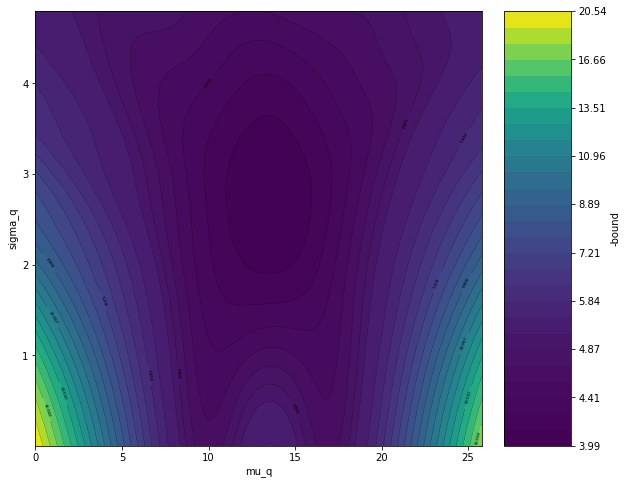

In [197]:
# alpha = 0.5

data_contour = pd.read_csv('../../numerical_analysis/contour_0.5.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(0, 26, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


In [185]:
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.2,np.log10(data_contour.to_numpy().max()), num=15)
levels = np.concatenate([levels1,levels2])
levels

array([ 4.1885376 ,  4.32860675,  4.47335997,  4.62295388,  4.77755038,
        4.93731675,  5.10242587,  5.27305642,  6.63838472,  7.49699205,
        8.46665146,  9.56172643, 10.79843817, 12.19510596, 13.77241847,
       15.55374026, 17.56545784, 19.83737056, 22.40313201, 25.30074853,
       28.57314216, 32.26878653, 36.44242477])

0.6220624181624116

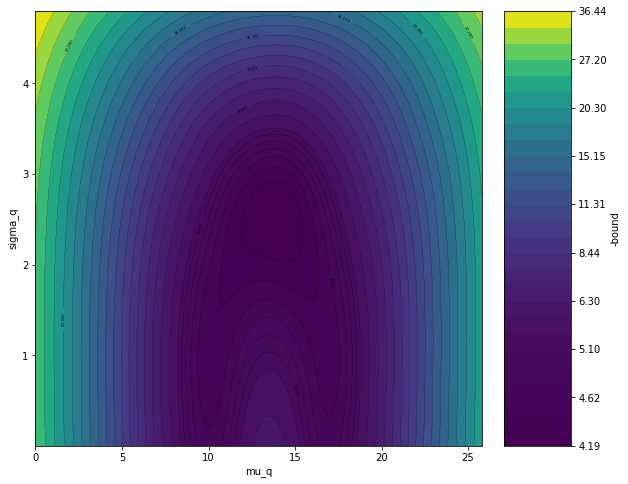

In [220]:
# alpha = 0.99
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])


data_contour = pd.read_csv('../../numerical_analysis/contour_0.99.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]

#levels = np.linspace(data_contour.to_numpy().min(),data_contour.to_numpy().max(), num=50)
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(0, 26, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


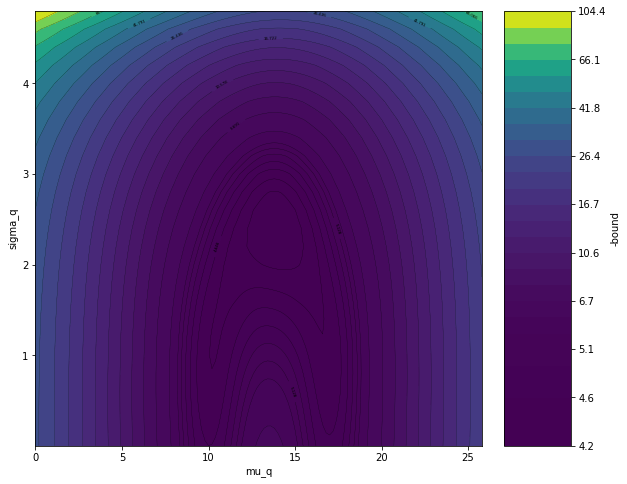

In [221]:
# alpha = 1.01

data_contour = pd.read_csv('../../numerical_analysis/contour_1.01.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])

linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(0, 26, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


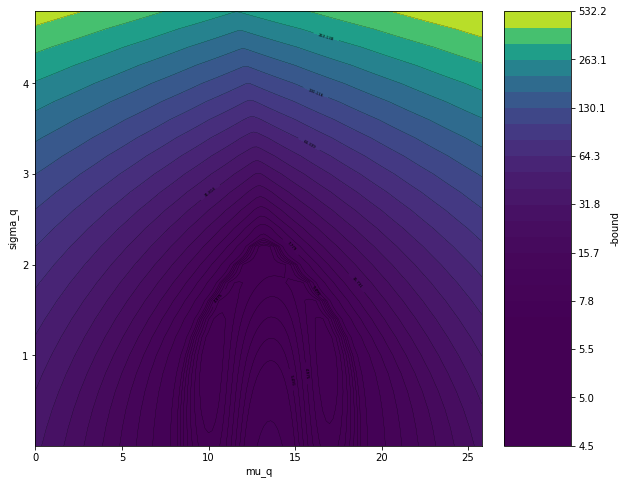

In [222]:
# alpha = 2


data_contour = pd.read_csv('../../numerical_analysis/contour_2.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])

linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(0, 26, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar


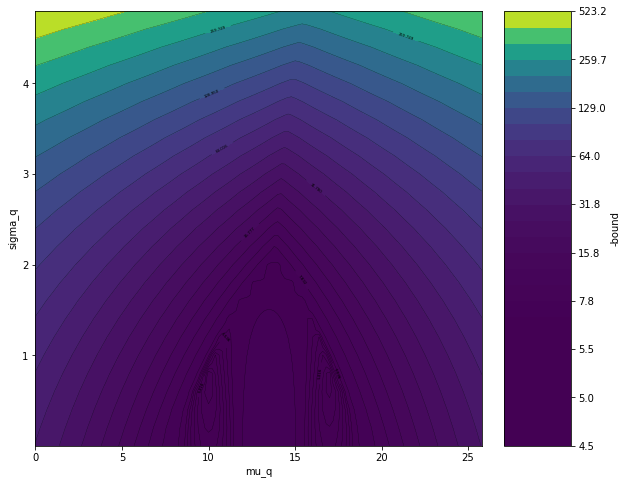

In [223]:
# alpha = 1e6

data_contour = pd.read_csv('../../numerical_analysis/contour_1000000.0.csv')
data_contour = data_contour.loc[:, ~data_contour.columns.str.contains('^Unnamed')]
levels1 = np.logspace(np.log10(data_contour.to_numpy().min()),np.log10(data_contour.to_numpy().min())+0.1, num=8)
levels2 = np.logspace(np.log10(data_contour.to_numpy().min())+0.135,np.log10(data_contour.to_numpy().max()), num=20)
levels = np.concatenate([levels1,levels2])
linewidth_contour = 0.2

delta1 = 0.2
delta2 = 0.2
xlist = np.arange(0, 26, delta1)
ylist = np.arange(0.001, 5, delta2)
x, y = np.meshgrid(xlist, ylist)

fig, axes = plt.subplots(1,1,  figsize =(8,8))

cpf = axes.contourf(x, y, data_contour.values.tolist(), levels)
line_colors1 = ['black' for l in cpf.levels]
cp = axes.contour(x, y, data_contour.values.tolist(),
                       levels=levels, colors=line_colors1, linewidths=linewidth_contour)
axes.clabel(cp, cp.levels[::3], inline=True, fontsize=4)

axes.set_xlabel('mu_q')
axes.set_ylabel('sigma_q')

axins1 = inset_axes(axes,
                   width="15%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=axes.transAxes,
                   borderpad=0,
                   )
plt.colorbar(cpf,label='-bound', cax=axins1)  # draw colorbar
